In [1]:
import matplotlib.pyplot as plt
import re
import os
import numpy as np
from plots import plot_train_compare2, plot_train_compare

In [64]:
def get_hp_args_from_txt(path):
    with open(path) as f:
        data_string = f.read()

        # Step 2: Define regex patterns to extract the values
        poison_lr_pattern = r"'poison_lr'\s*:\s*([0-9.]+)"
        iterations_pattern = r"'iterations'\s*:\s*(\d+)"
        epsilon_pattern = r"'epsilon'\s*:\s*([0-9.]+)"
        poison_start_epoch_pattern = r"'poison_start_epoch'\s*:\s*(\d+)"

        # Step 3: Extract the values using regex
        poison_lr = re.search(poison_lr_pattern, data_string).group(1)
        iterations = re.search(iterations_pattern, data_string).group(1)
        epsilon = re.search(epsilon_pattern, data_string).group(1)
        poison_start_epoch = re.search(poison_start_epoch_pattern, data_string).group(1)

        # Print the extracted values
        return (poison_lr, iterations, epsilon, poison_start_epoch)

def get_vals_from_txt(path):
    vals = []
    vals_p = []
    with open(path) as f:
        highest_val = -1
        highest_val_p = -1
        i = 0
        for l in f.readlines():
            i += 1
            val_acc = float(re.findall(r"Val_accuracy:(\d+\.\d+)", l)[0])
            if i >= 200:
                break
            elif i >= 100:
                if val_acc > highest_val_p:
                    highest_val_p = val_acc
                vals_p.append(val_acc)
            elif i < 100:
                if val_acc > highest_val:
                    highest_val = val_acc
                vals.append(val_acc)
    return (vals, vals_p, highest_val, highest_val_p)
    

In [65]:
def construct_run_dicts():
    base_path = 'experiment_results_from_eddie/fmnist_res_net_18/poison_tune1_2'
    ids = next(os.walk(base_path))[1]
    runs = {}
    for id in ids:
        d = {}
        p_args = f"{base_path}/{id}/args.txt"
        poison_lr, iterations, epsilon, poison_start_epoch = get_hp_args_from_txt(p_args)
        d["poison_lr"] = float(poison_lr)
        d["iterations"] = int(iterations)
        d["epsilon"] = float(epsilon)
        d["poison_start_epoch"] = int(poison_start_epoch)

        p_vals = f"{base_path}/{id}/metrics.txt"
        vals, vals_p, highest_val, highest_val_p = get_vals_from_txt(p_vals)
        d["vals"] = vals
        d["vals_p"] = vals_p
        d["highest_val"] = highest_val
        d["highest_val_p"] = highest_val_p

        runs[id] = d
    return runs

runs = construct_run_dicts()
runs

{'30835': {'poison_lr': 0.001,
  'iterations': 50,
  'epsilon': 0.0,
  'poison_start_epoch': 0,
  'vals': [84.625,
   86.85,
   89.225,
   89.975,
   89.525,
   90.325,
   90.0,
   90.85,
   91.1,
   90.875,
   91.325,
   90.75,
   90.75,
   91.5,
   91.575,
   91.375,
   91.175,
   91.4,
   91.5,
   91.45,
   91.325,
   91.15,
   90.975,
   91.525,
   91.9,
   91.325,
   91.3,
   92.025,
   91.5,
   91.8,
   91.375,
   92.1,
   91.35,
   91.6,
   91.45,
   91.55,
   91.475,
   92.025,
   91.975,
   92.025,
   92.025,
   91.85,
   91.65,
   92.025,
   91.825,
   91.625,
   92.075,
   91.975,
   91.6,
   91.75,
   92.225,
   91.6,
   91.95,
   91.525,
   91.5,
   91.875,
   91.725,
   91.65,
   91.35,
   91.55,
   91.8,
   92.275,
   91.55,
   91.925,
   91.75,
   92.025,
   91.7,
   91.875,
   91.925,
   91.625,
   92.1,
   92.025,
   91.9,
   91.85,
   92.05,
   91.725,
   92.1,
   92.125,
   91.925,
   91.75,
   91.75,
   91.85,
   92.1,
   91.9,
   92.4,
   92.3,
   91.9,
   92.075,

92.17500000000001 92.2125
92.425 92.35624999999999


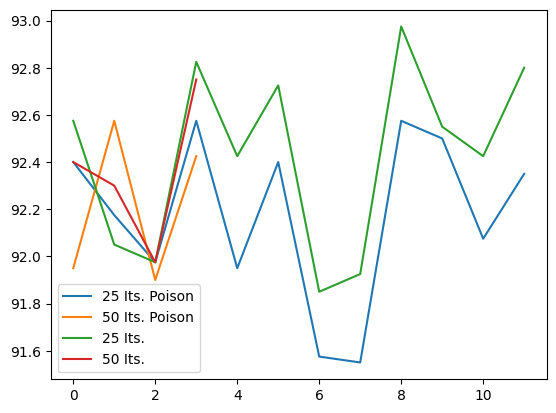

In [72]:
it25 = [runs[run] for run in runs if runs[run]["iterations"] == 25]
it50 = [runs[run] for run in runs if runs[run]["iterations"] == 50]

it25_highest_val_p = [run["highest_val_p"] for run in it25]
it50_highest_val_p = [run["highest_val_p"] for run in it50]

it25_highest_val = [run["highest_val"] for run in it25]
it50_highest_val = [run["highest_val"] for run in it50]

print(np.mean(it25_highest_val_p), np.mean(it50_highest_val_p))
print(np.mean(it25_highest_val), np.mean(it50_highest_val))

plt.plot(it25_highest_val_p, label="25 Its. Poison")
plt.plot(it50_highest_val_p, label="50 Its. Poison")
plt.plot(it25_highest_val, label="25 Its.")
plt.plot(it50_highest_val, label="50 Its.")
plt.legend()

92.2825 92.02083333333333
92.49 92.27083333333333


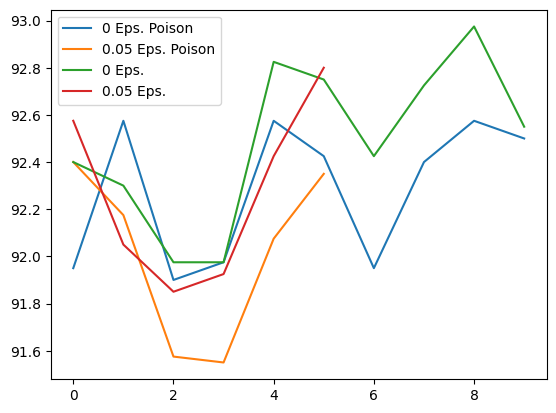

In [73]:
eps0 = [runs[run] for run in runs if runs[run]["epsilon"] == 0]
eps05 = [runs[run] for run in runs if runs[run]["epsilon"] == 0.05]

eps0_highest_val_p = [run["highest_val_p"] for run in eps0]
eps05_highest_val_p = [run["highest_val_p"] for run in eps05]

eps0_highest_val = [run["highest_val"] for run in eps0]
eps05_highest_val = [run["highest_val"] for run in eps05]

print(np.mean(eps0_highest_val_p), np.mean(eps05_highest_val_p))
print(np.mean(eps0_highest_val), np.mean(eps05_highest_val))

plt.plot(eps0_highest_val_p, label="0 Eps. Poison")
plt.plot(eps05_highest_val_p, label="0.05 Eps. Poison")
plt.plot(eps0_highest_val, label="0 Eps.")
plt.plot(eps05_highest_val, label="0.05 Eps.")
plt.legend()

In [ ]:
lr01 = [runs[run] for run in runs if runs[run]["poison_lr"] == 0.1]
lr001 = [runs[run] for run in runs if runs[run]["poison_lr"] == 0.01]
lr0001 = [runs[run] for run in runs if runs[run]["poison_lr"] == 0.001]


lr01_highest_val_p = [run["highest_val_p"] for run in lr01]
lr001_highest_val_p = [run["highest_val_p"] for run in lr001]
lr0001_highest_val_p = [run["highest_val_p"] for run in lr0001]


lr01_highest_val = [run["highest_val"] for run in lr01]
lr001_highest_val = [run["highest_val"] for run in lr001]
lr0001_highest_val = [run["highest_val"] for run in lr0001]

print(np.mean(lr01_highest_val_p), np.mean(lr001_highest_val_p), np.mean(lr0001_highest_val_p))
print(np.mean(lr01_highest_val), np.mean(lr001_highest_val), np.mean(lr0001_highest_val))

plt.plot(lr01_highest_val_p, label="0.1 LR Poison")
plt.plot(lr001_highest_val_p, label="0.01 LR Poison")
plt.plot(lr0001_highest_val_p, label="0.001 LR Poison")
plt.plot(lr01_highest_val, label="0.1 LR")
plt.plot(lr001_highest_val, label="0.01 LR")
plt.plot(lr0001_highest_val, label="0.001 LR")
plt.legend()

92.13125 92.125 92.27916666666668
92.40625 92.2625 92.55416666666667


In [69]:
pse0 = [runs[run] for run in runs if runs[run]["poison_start_epoch"] == 0]
pse10 = [runs[run] for run in runs if runs[run]["poison_start_epoch"] == 10]

pse0_highest_val_p = [run["highest_val_p"] for run in pse0]
pse10_highest_val_p = [run["highest_val_p"] for run in pse10]

pse0_highest_val = [run["highest_val"] for run in pse0]
pse10_highest_val = [run["highest_val"] for run in pse10]

print(np.mean(pse0_highest_val_p), np.mean(pse10_highest_val_p))
print(np.mean(pse0_highest_val), np.mean(pse10_highest_val))

92.04375 92.325
92.26249999999999 92.553125
